# Elementary Introduction to Linear Algebra with NumPy


Author: Pierre Nugues, revised by Maj Stenmark

_À mes anciens profs de maths, un élève respectueux_

_À ma HP-21_

### Imports
Start with importing all modules that you will need in this tutorial.

In [1]:
# pip install torch matplotlib numpy tensorflow
import torch
import numpy as np
import sklearn
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

We will set random seeds to make sure that the examples are reproducable. 

In [2]:
random.seed(4321)
np.random.seed(4321)
torch.manual_seed(4321)
tf.keras.utils.set_random_seed(4321)

## Vector space
A vector space is a set consisting of 
1. Elements called vectors, represented as ￼ tuples: 
* 2D vectors: (2,3)
* 3D vectors: (1,2,3)
* n-dimensional vectors: (1,2,3,4,...) 
2. With two operations: 
* internal, $R^n$ × $R^n$￼ → $R^n$, the addition, denoted + 
* external, ￼$R$ × ￼$R^n$ → $R^n$￼, the multiplication by a scalar (a real number), denoted ·

Concepts used in many applications, for instance robotics.

Let $u$ and $v$ be two vectors:

$u = (u_1,u_2,...,u_n)$ 

$v = (v_1,v_2,...,v_n)$

The operations:
Addition: $u + v$, a vector $(u_1 + v_1,u_2 + v_2,…,u_n + v_n)$ 

Multiplication by scalar: $\lambda$ $\cdot$ $v$, a vector (we usually drop the dot) $(\lambda v_1,\lambda v_2,...,\lambda v_n)$

### Creating vectors


With numpy

In [3]:
np.array([2, 3])
np.array([1, 2, 3])

array([1, 2, 3])

With PyTorch

In [4]:
torch.tensor([2, 3])
torch.tensor([1, 2, 3])

tensor([1, 2, 3])

## Indices and Slices
We access vector coordinates, read or write, with NumPy indices and _slices_.

They are identical to Python.

Indices start at 0, following most programming languages, and contrary to the mathematical convention to start at 1. 

In [5]:
vector = np.array([1, 2, 3, 4])
vector

array([1, 2, 3, 4])

In [6]:
vector[1] # 2

np.int64(2)

Intervals are specified with a ```start:end (exclusive)```. If either the start or end is left out, the interval will start with the first, or end with the last element in the vector. 

In [7]:
vector[:1] # [1]

array([1])

In [8]:
vector[1:3] # [2, 3]

array([2, 3])

Similarly, in torch:

In [9]:
vector = torch.tensor([1, 2, 3, 4])
vector

tensor([1, 2, 3, 4])

In [10]:
vector[0]

tensor(1)

In [11]:
vector[:1]

tensor([1])

In [12]:
vector[1:3]

tensor([2, 3])

## Visualizing vectors

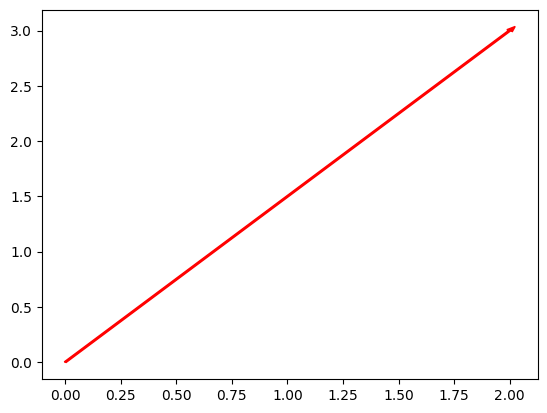

In [13]:
plt.arrow(0, 0, np.array([2, 3])[0], np.array([2, 3])[1], width=0.01, color='red')

## Operations in the vector space

Addition:

In [14]:
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

Multiplication with a scalar:

In [15]:
3 * np.array([1, 2, 3])

array([3, 6, 9])

Addition in PyTorch:

In [16]:
torch.tensor([1, 2, 3]) + torch.tensor([4, 5, 6])

tensor([5, 7, 9])

Multiplication with a scalar in PyTorch:

In [17]:
3 * torch.tensor([1, 2, 3])

tensor([3, 6, 9])

## From NumPy to PyTorch and vice-versa

To convert from numpy vectors to torch tensors:

In [18]:
np_array = np.array([1, 2, 3])
tensor = torch.from_numpy(np_array)
tensor

tensor([1, 2, 3])

... and vice versa:

In [19]:
tensor = torch.tensor([1, 2, 3])
np_array = tensor.numpy()
np_array

array([1, 2, 3])

## Data Types

Numpy vectors will infer the data type from the numerical values in the argument. 

In [20]:
vector = np.array([1, 2, 3])

In [21]:
vector.dtype

dtype('int64')

To change the default data type, you can specify the ```dtype``` argument, e.g, to ```int32```

In [22]:
vector = np.array([1, 2, 3], dtype='int32')
vector


array([1, 2, 3], dtype=int32)

In [23]:
vector.dtype

dtype('int32')

... or ```float64```

In [24]:
vector = np.array([1, 2, 3], dtype='float64')
vector

array([1., 2., 3.])

In [25]:
vector.dtype

dtype('float64')

... or boolean values

In [26]:
np.array([0, 1, 2, 3], dtype='bool')

array([False,  True,  True,  True])

Similarly, we can do the same thing in PyTorch:

In [27]:
torch.tensor([1, 2, 3]).dtype

torch.int64

In [28]:
torch.tensor([1, 2, 3], dtype=torch.float16)

tensor([1., 2., 3.], dtype=torch.float16)

## Dot Product

A Euclidian vector space consists of a vector space and a bilinear form: 
￼$R^n$ × ￼$R^n$ → ￼$R^n$
$f(u,v) = z$

called the dot product and defined as 

$u  = (u_1,u_2,...,u_n) $

$v  = (v_1,v_2,...,v_n) $

$u \cdot v = \sum u_i v_i$ 

Dot product in numpy can be calculated using either the method ```dot``` or ```@```

In [29]:
np.dot(np.array([1, 2, 3]), np.array([4, 5, 6]))

np.int64(32)

or using the ```@``` operator like this:

In [30]:
np.array([1, 2, 3]) @ np.array([4, 5, 6])

np.int64(32)

PyTorch also has both a ```dot``` method and an inline ```@``` operator

In [31]:
torch.dot(torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6]))

tensor(32)

and

In [32]:
torch.tensor([1, 2, 3]) @ torch.tensor([4, 5, 6])

tensor(32)

## Element-wise Product (Hadamard)
One possible source of confusion is the ```*``` operator. This is not part of the vector space definitions and should not to be confused the dot and matrix products

In [33]:
np.array([1, 2, 3]) * np.array([4, 5, 6]) #(1x4, 2x5, 3x6)

array([ 4, 10, 18])

The same goes with tensors:

In [34]:
torch.tensor([1, 2, 3]) * torch.tensor([4, 5, 6])

tensor([ 4, 10, 18])

## Norm

The dot product of a vector by itself defines a metric in the Euclidian vector space.

Its square root is called the norm: 

$\Vert u \Vert = \sqrt{u \cdot u}$

It corresponds to the magnitude of the vector (its length) 



In [35]:
np.linalg.norm(np.array([1, 2, 3]))

np.float64(3.7416573867739413)

In [36]:
torch.norm(torch.tensor([1.0, 2.0, 3.0]))

tensor(3.7417)

### Cosine similarity
We often use a generalized cosine to compute similarity of two vectors: 
￼
$cos(\widehat{\textbf{u}, \textbf{v}}) = \frac{ \textbf{u} \cdot  \textbf{v}}{\lVert \textbf{u} \rVert  \lVert \textbf{v} \rVert }$

In [37]:
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])
similarity = np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

# Linear and affine maps
Simplest form of maps:

* Linear maps (function) 

$R$￼ → $R$

$x → f(x) = ax$

* Affine map (function)
$R$￼ → $R$

$x → f(x) = ax + b$

Linear maps are defined by the properties:

$f(x + y) = f(x) + f(y)$

$f(\lambda x) = \lambda f(x)$

## Linear functions and vectors
Extending linear functions to vectors: A linear combination of the 
coordinates 

$R^n \rightarrow R^n$

$x \rightarrow f(x) =  y $

If the function is a matrix $A$ it becomes

$x \rightarrow Ax = y$

With a matrix notation: 
$A x \rightarrow \begin{bmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2
\end{bmatrix} = \begin{bmatrix}
a_{11} x_1 + a_{12} x_2\\
a_{21} x_1 + a_{22} x_2
\end{bmatrix} = \begin{bmatrix}
y_1\\
y_2
\end{bmatrix}$

This is the dot product of $x$ with each row of the matrix 

## Matrix example
Let us give values to this system:
$$
\begin{array}{lcl}
a_{11} x_1 + a_{12} x_2 &=& y_1\\
a_{21} x_1 + a_{22} x_2 &=& y_2\\
\end{array}
$$
For instance:
$$
\begin{array}{lcl}
1\times x_1 + 2\times x_2 &=& y_1\\
3 \times x_1 + 4 \times x_2 &=& y_2\\
\end{array}
$$

With 
$\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix} = \begin{bmatrix}
5\\
6\\
\end{bmatrix}$ and $ \begin{bmatrix}
y_1\\
y_2\\
\end{bmatrix} = \begin{bmatrix}
17\\
39\\
\end{bmatrix}
$

We have:
$$
\begin{bmatrix}
1 &2\\
3 &4\\
\end{bmatrix}  
\begin{bmatrix}
5\\
6\\
\end{bmatrix} =
\begin{bmatrix}
17\\
39\\
\end{bmatrix}
$$

## NumPy Matrices
Computing $A \mathbf{x}$ in numpy.

FIrst define $A$

In [38]:
A = np.array([[1, 2],
          [3, 4]])
A

array([[1, 2],
       [3, 4]])

Matrix multiplication is the dot product with each row in the matrix.

In [39]:
A @ np.array([5, 6])

array([17, 39])

Matrix indices are written within the brackets:

In [40]:
A[0, 1]

np.int64(2)

Indices can also be given as a range:

In [41]:
A[:,:] = 1 # set all elements to 1
A

array([[1, 1],
       [1, 1]])

Similarly, in PyTorch:

In [42]:
A = torch.tensor([[1, 2],
          [3, 4]])
A @ torch.tensor([5, 6])

tensor([17, 39])

In [43]:
A[0, 1]
A

tensor([[1, 2],
        [3, 4]])

In [44]:
A[:,:] = 1
A

tensor([[1, 1],
        [1, 1]])

Matrices in numpy/PyTorch are multidimensional. For example, an image has 3 dimensions, each pixel has a y-value (row), a x-value (column), and the last dimension have 3 values representing the RGB-values of the color of the pixel. 

We can download a picture of a baguette with the following command:

In [45]:
!curl -o baguette.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Baguette_de_pain%2C_WikiCheese_Lausanne.jpg/1920px-Baguette_de_pain%2C_WikiCheese_Lausanne.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  152k  100  152k    0     0  1130k      0 --:--:-- --:--:-- --:--:-- 1134k


First, we will read the image and visualize the image using ```imread``` and ```imshow```:

(932, 1920, 3)


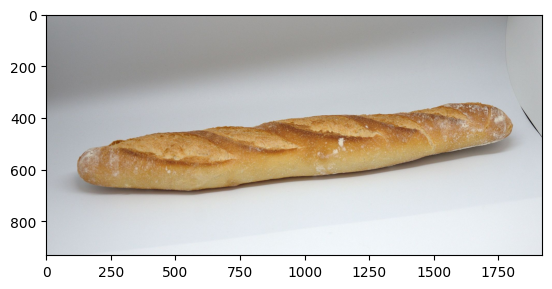

In [46]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


img = mpimg.imread('baguette.jpg') 
print(img.shape)
plt.imshow(img)



We can cut a part of the image using matrix slicing:

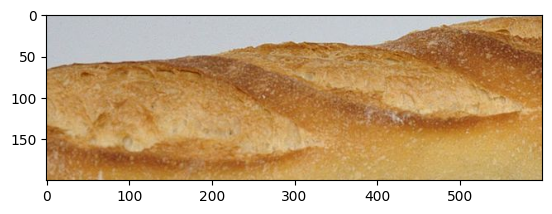

In [47]:

plt.imshow(img[400:600, 400:1000, :])

If we skip the first color when we copy the values of the image to the variable ```nored```, we will remove red from the image.

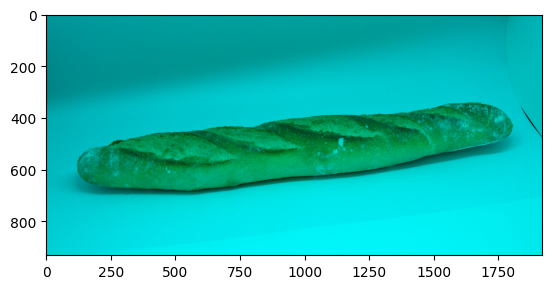

In [48]:
nored = np.zeros(img.shape, dtype = img.dtype)
nored[:, :, 1:3] = img[:, :, 1:3]
plt.imshow(nored)

## Matrix operations

Matrix additions and multiplications by a scalar are the same as with 
vectors: 

$A = \begin{bmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{bmatrix}$ , 
$B = \begin{bmatrix}
b_{11} & b_{12}\\
b_{21} & b_{22}
\end{bmatrix}$

$
A + B = \begin{bmatrix}
a_{11} + b_{11} & a_{12} + b_{12}\\
a_{21} + b_{21} & a_{22}+ b_{22}
\end{bmatrix}
$

And in code:

In [49]:
np.array([[1, 2], [2, 4]]) + np.array([[5, 6], [7, 8]])

array([[ 6,  8],
       [ 9, 12]])

Multiplication with a scalar $\lambda$:

$
\lambda A = \begin{bmatrix}
\lambda a_{11} & \lambda a_{12}\\
\lambda a_{21} & \lambda a_{22}
\end{bmatrix}$

For example with:

In [50]:
0.5 * np.array([[1, 2], [2, 4]])

array([[0.5, 1. ],
       [1. , 2. ]])

In PyTorch

In [51]:
torch.tensor([[1, 2], [2, 4]]) + torch.tensor([[5, 6], [7, 8]])

tensor([[ 6,  8],
        [ 9, 12]])

In [52]:
0.5 * torch.tensor([[1, 2], [2, 4]])

tensor([[0.5000, 1.0000],
        [1.0000, 2.0000]])

## Element-wise Multiplication
Note that ```*``` is __not__ the matrix product, it is element-wise multiplication (Hadamard product)

$
A \odot  B = \begin{bmatrix}
a_{11}  b_{11} & a_{12}  b_{12}\\
a_{21}  b_{21} & a_{22} b_{22}
\end{bmatrix}
$

In [53]:
np.array([[1, 2], [2, 4]]) * np.array([[5, 6], [7, 8]]) #which is not the same as matrix multiplication

array([[ 5, 12],
       [14, 32]])

In [54]:
torch.tensor([[1, 2], [2, 4]]) * torch.tensor([[5, 6], [7, 8]])

tensor([[ 5, 12],
        [14, 32]])

## Matrices and Rotations

We will now have a look at vector rotation. From algebra courses, we know that we can use a matrix to compute a rotation of angle $\theta$. For a two-dimensional vector, the rotation matrix is:
$$
R_{\theta} =
\begin{bmatrix*}
\cos \theta &-\sin \theta \\
\sin \theta & \cos \theta \\
\end{bmatrix*}.
$$

Rotation of an angle of π/4 of vector (1,1):
$\begin{bmatrix}
\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2}\\
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}
\end{bmatrix} \begin{bmatrix}
1\\
1
\end{bmatrix} = \begin{bmatrix}
0\\
\sqrt{2}
\end{bmatrix}$

In [55]:
theta_45 = np.pi/4
rot_mat_45 = np.array([[np.cos(theta_45), -np.sin(theta_45)],
          [np.sin(theta_45), np.cos(theta_45)]])
rot_mat_45

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

we rotate vector (1, 1) by this angle

In [56]:
rot_mat_45 @ np.array([1, 1])

array([1.11022302e-16, 1.41421356e+00])

The matrix of a sequence of rotations, for instance a rotation of $\pi/6$ followed by a rotation of $\pi/4$, is simply the matrix product of the individual rotations $R_{{\theta}_1} R_{{\theta}_2}  = R_{{\theta}_1 + {\theta}_2}$, here $R_{\pi/4} R_{\pi/6}  = R_{5\pi/12}$. 

Note the order of the multiplication of the rotation matrices, when rotating in the global coordinate system the matrices will be multiplied from the _left_, then applying rotations in a local coordinate system, the matrices are multiplied from the _right_.

In [57]:
theta_30 = np.pi/6
rot_mat_30 = np.array([[np.cos(theta_30), -np.sin(theta_30)],
          [np.sin(theta_30), np.cos(theta_30)]])
rot_mat_30

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [58]:
rot_mat_30 @ rot_mat_45

array([[ 0.25881905, -0.96592583],
       [ 0.96592583,  0.25881905]])

In [59]:
rot_mat_45 @ rot_mat_30

array([[ 0.25881905, -0.96592583],
       [ 0.96592583,  0.25881905]])

In [60]:
np.arccos(0.25881905)

np.float64(1.3089969339255036)

In [61]:
np.pi/4 + np.pi/6

1.308996938995747

With PyTorch

In [62]:
torch.from_numpy(rot_mat_30) @ torch.from_numpy(rot_mat_45)

tensor([[ 0.2588, -0.9659],
        [ 0.9659,  0.2588]], dtype=torch.float64)

In [63]:
torch.from_numpy(rot_mat_45) @ torch.from_numpy(rot_mat_30)

tensor([[ 0.2588, -0.9659],
        [ 0.9659,  0.2588]], dtype=torch.float64)

## Inverse

Inverse function $g$ of $f$ defined as:
$\forall x,(f \circ g)(x)=(g \circ f)(x)=x$

Denoted: 
$g = f^{-1}$

For matrices: 

$M M^{-1 } = M^{-1} M = I$

where $I$ is the identity matrix with a diagonal of ones. 

Numpy Inverse:

In [64]:
np.linalg.inv(rot_mat_30)

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [65]:
np.linalg.inv(rot_mat_30) @ rot_mat_30

array([[1.00000000e+00, 7.43708407e-18],
       [6.29482353e-17, 1.00000000e+00]])

In [66]:
torch.inverse(torch.from_numpy(rot_mat_30)) 

tensor([[ 0.8660,  0.5000],
        [-0.5000,  0.8660]], dtype=torch.float64)

## Size of a Matrix

The size of a matrix is the number of rows and number of columns. The are called the dimensions of the matrix: 

In [67]:
A = np.array([[1, 2, 3],
            [4, 5, 6]])
A.shape

(2, 3)

In [68]:
A = torch.tensor([[1, 2, 3],
            [4, 5, 6]])
A.size()

torch.Size([2, 3])

The size of a vector in numpy is a tuple with one value

In [69]:
x = np.array([1, 2, 3])
x.shape

(3,)

And in PyTorch, it is expressed using a list with one value:

In [70]:
x = torch.tensor([1, 2, 3])
x.size()

torch.Size([3])

## Transpose

The transpose of a matrix $A = [a_{i,j} ]$ is defined as $A^T = [a_{j,i}]$. 

This is the flipped matrix with regard to the diagonal. An important property: 
$(AB)^T = B^T A^T$

In [71]:
A = np.array([[1, 2],
          [3, 4]])
A.T

array([[1, 3],
       [2, 4]])

In [72]:
A = torch.tensor([[1, 2],
          [3, 4]])
A.T

tensor([[1, 3],
        [2, 4]])

## Transposing a Vector

Transposing arrays with another dimension than 2 does not make much sense (see the definition above).

In [73]:
x = np.array([1, 2, 3])
x.T

array([1, 2, 3])

In [74]:
x = torch.tensor([1, 2, 3])
x.T

/var/folders/kf/bnch0cld3j1818zdbvh8j9000000gq/T/ipykernel_26181/2773976921.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3687.)
  x.T


tensor([1, 2, 3])

## Reshaping a Vector

We can convert a vector that has no direction (neither vertical or horizontal) to a __row vector__ or a __column vector__ with dimensions $(1 \times n)$ or $(n \times 1)$. The ```reshape``` method can be used to change the dimensions of the ```np.array```.

In [75]:
x = np.array([1, 2, 3])
x.reshape((1,3))

array([[1, 2, 3]])

In [76]:
x.reshape((1,3)).T

array([[1],
       [2],
       [3]])

Using the argument $-1$ will calculate the last dimension from the number of elements in the ```np.array```.

In [77]:
x = np.array([1, 2, 3])
x.reshape((1,-1))

array([[1, 2, 3]])

Similarly in PyTorch:

In [78]:
x = torch.tensor([1, 2, 3])
x.reshape((1,-1))

tensor([[1, 2, 3]])

In [79]:
x.reshape((1,-1)).T

tensor([[1],
        [2],
        [3]])

This is very useful when processing data, for example an image:

In [80]:
img = mpimg.imread('one.png')
img.shape

(28, 28)

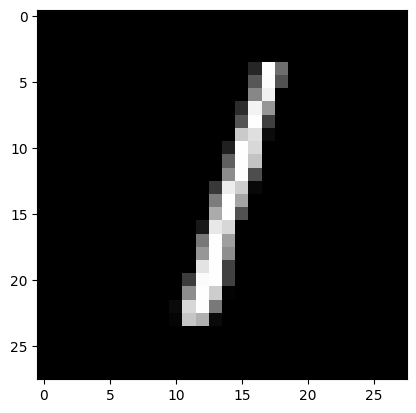

In [81]:
plt.imshow(img, cmap='gray')

But when dealing with input data we want to have a (column) vector. Then we can reshape the image:

In [82]:
X = img.reshape(-1, 1)
X.shape

(784, 1)

Going back to an image, we can use reshape again:

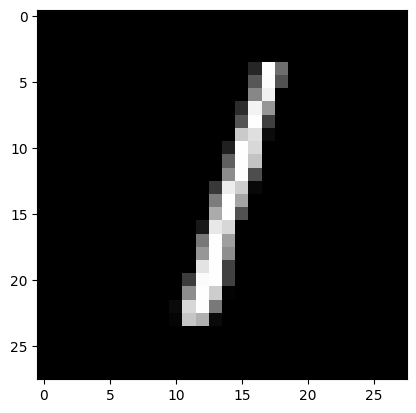

In [83]:
img2 = X.reshape(28, 28)
plt.imshow(img2, cmap='gray')

## Utilities

We can add a dimension by using ```np.newaxis``` as an index, which will return a new ```np.array``` instead of reshaping:

In [84]:
v = np.array([1, 2, 3])
vrows = v[:, np.newaxis]
vrows

array([[1],
       [2],
       [3]])

In [85]:
vcols = v[np.newaxis, :]    
vcols

array([[1, 2, 3]])

There are some commonly used utility functions for creating matrices:

In [86]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [87]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [88]:
np.ones((2, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [89]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [90]:
np.random.rand(2, 4)

array([[0.07080288, 0.81506401, 0.76790496, 0.2863545 ],
       [0.19309431, 0.97891221, 0.40622871, 0.75776787]])

In [91]:
torch.rand(2, 4)

tensor([[0.1255, 0.5377, 0.6564, 0.0365],
        [0.5837, 0.7018, 0.3068, 0.9500]])

Other utilities that we will use in the labs are the ```arange``` method that gives a range of values:

In [92]:
np.arange(0, 10, 2) # start, end, step


array([0, 2, 4, 6, 8])

# Batch operations

To handle large amounts of data, we often _batch_ operations (during training of neural networks). We can apply the same multiplication to many matrices at the same time using a batch.

For example, we have a matrix $W = [0.5, 0.25]$ and 3 $(2 \times 1)$ $x_i$ matrices that we want to multiply with the matrix $W$, $y_i = Wx_i$: 

In [93]:
W = np.array([[0.5, 0.25]]) # 1x2 matrix
x1 = np.array([[1], [0]])
x2 = np.array([[0], [1]])
x3 = np.array([[1], [1]])
X = np.array([x1, x2, x3])
X.shape 


(3, 2, 1)

In [94]:

y = np.dot(W, X)  
y



array([[[0.5 ],
        [0.25],
        [0.75]]])

## Short comment on neural networks

In [95]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [96]:
train_images[0].shape

(28, 28)

In [97]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

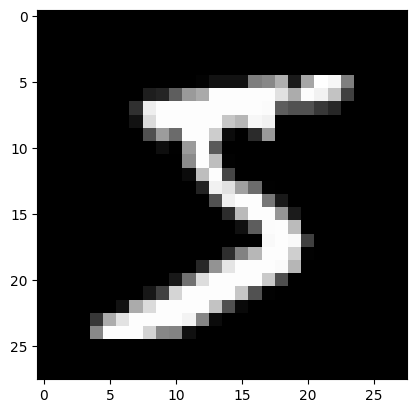

In [98]:
plt.figure()
plt.imshow(train_images[0]/255, cmap='gray')

As you can see, the y-axis points down.

We create an image from the matrix with the mathematical conventions for coordinates.

In [99]:
gray_image = np.zeros(train_images[0].shape)
for x in np.arange(train_images[0].shape[0]):
    for y in np.arange(train_images[0].shape[1]):
        gray_image[x, y] = train_images[0].T[x, 
                          train_images[0].shape[1] - 1 - y]


We generate all the point coordinates

In [100]:
im_coord = []
for x in np.arange(gray_image.shape[0]):
    for y in np.arange(gray_image.shape[1]):
        im_coord += [[x, y]]
im_coord = np.array(im_coord).T

In [101]:
im_coord

array([[ 0,  0,  0, ..., 27, 27, 27],
       [ 0,  1,  2, ..., 25, 26, 27]])

The original image with these coordinates

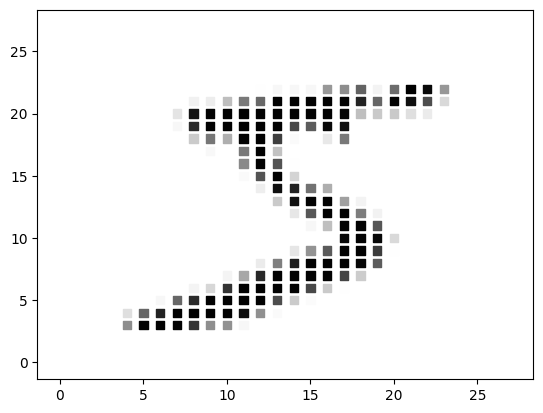

In [102]:
plt.scatter(im_coord[0, :], im_coord[1, :],
 c=np.array(gray_image.flatten())/255, cmap='Greys', marker='s') #each pair of points will be colored according to the corresponding pixel value

### Scaling

We will scale the image to twice as wide and half the height.

In [103]:
scale_mat = np.array([[2, 0], 
                      [0, 0.5]]) # scale by 2 in x and 0.5 in y

In [104]:
transformed = scale_mat @ im_coord
transformed

array([[ 0. ,  0. ,  0. , ..., 54. , 54. , 54. ],
       [ 0. ,  0.5,  1. , ..., 12.5, 13. , 13.5]])

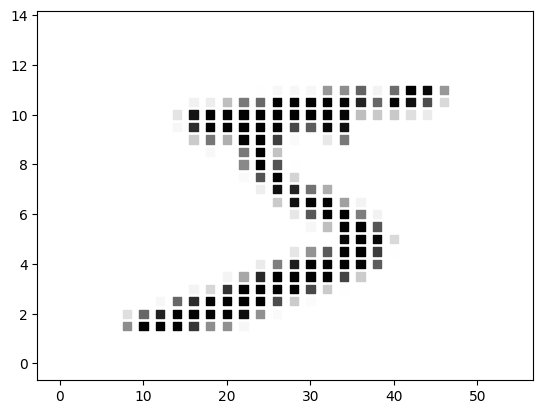

In [105]:
plt.scatter(transformed[0, :], transformed[1, :],
 c=np.array(gray_image.flatten())/255, cmap='Greys', marker='s')

### Rotating

In [106]:
transformed = rot_mat_30 @ im_coord

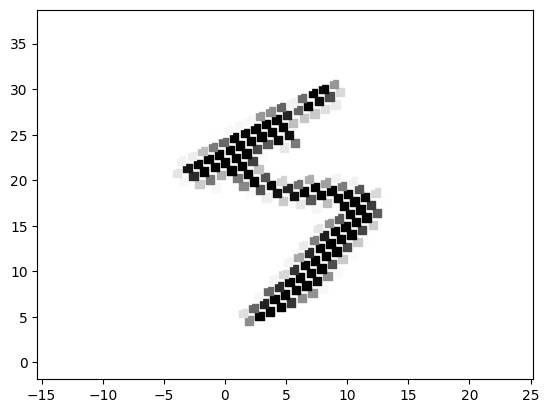

In [107]:
plt.scatter(transformed[0, :], transformed[1, :],
 c=np.array(gray_image.flatten())/255, cmap='Greys', marker='s')

We can scale and then rotate.

In [108]:
transformed =  rot_mat_30 @  scale_mat @ im_coord

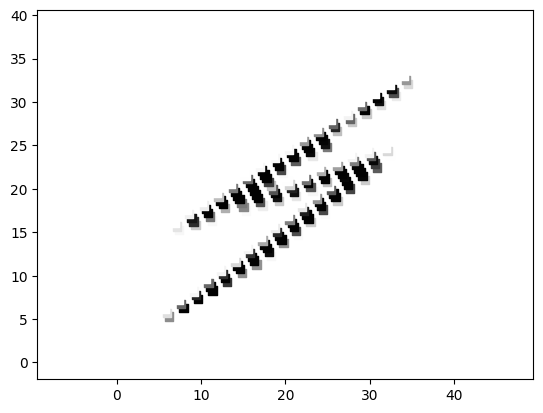

In [109]:
plt.scatter(transformed[0, :], transformed[1, :],
 c=np.array(gray_image.flatten())/255, cmap='Greys', marker='s')

We can also add a matrix (bias) $b$

$\mathbf{W}\mathbf{x} + \mathbf{b}$

In [110]:
transformed = (rot_mat_45 @ rot_mat_30 @ 
scale_mat @ im_coord + np.array([[-20, -20]]).T)

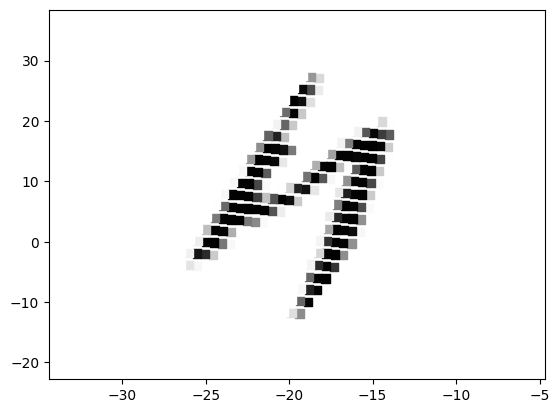

In [111]:
plt.scatter(transformed[0, :], transformed[1, :],
 c=np.array(gray_image.flatten())/255, cmap='Greys', marker='s')

### Nonlinearity

We can cap the values of the gray_image:

In [112]:
gray_image = np.maximum(128, gray_image)

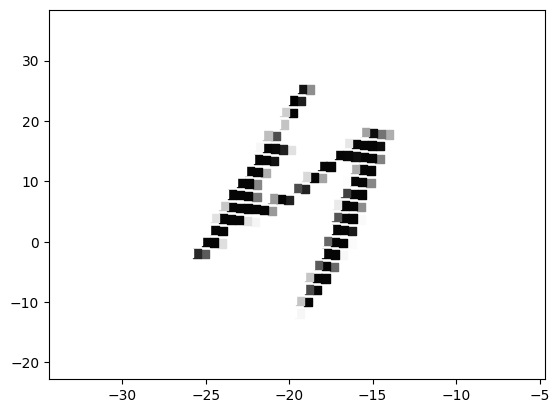

In [113]:
plt.scatter(transformed[0, :], transformed[1, :],
 c=np.array(gray_image.flatten())/255, cmap='Greys', marker='s')

## Matrices and Neural Nets

In the following examples we will work with a small fully connected neural network as shown in the image.

<img src=nn.png alt="A small neural network"/>

### Applying Transformations in Neural Networks
In neural networks, every edge in the network has a weight. In every node, the input $z_i^{(L)}$ is the weighted sum of the outputs from the previous layer: $z_i^{(2)} = \sum_i w_{ij} a_j^{(1)} + b_i$. $b_i$ is the intercept or bias. 

This can be written in matrix form with all the weights in the matrix $W$ and the bias in a (column) vector $b$: $W x + b$

The output from a node $a_i^{(L)}$ is calculated using an activation function $a_i^{(L)} = g(z_i^{(L)})$. Because functions are element-wise, the all the outputs from one layer can be calculated in matrix form too: $a = g(W x + b)$.

The activation function can be linear or nonlinear. A popular linear activation function is the logistic function:



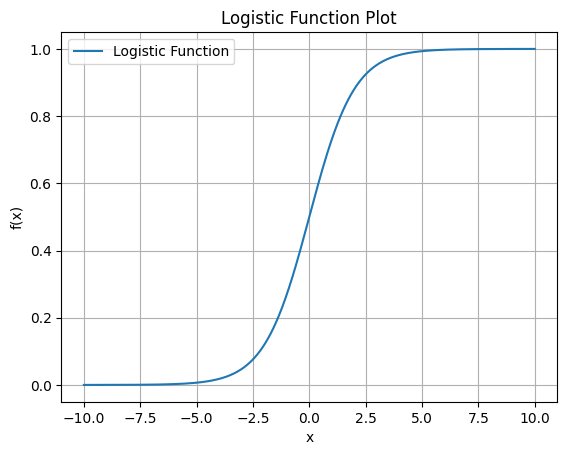

In [114]:
# This is what the logistic function looks like


# Define the logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 500)
# Compute y values using the logistic function
y = logistic(x)

# Plot the logistic function
plt.plot(x, y, label="Logistic Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Logistic Function Plot")
plt.grid(True)
plt.legend()
plt.show()

A popular nonlinear activation function is the $g = max(0,x)$, which is called relu(x).

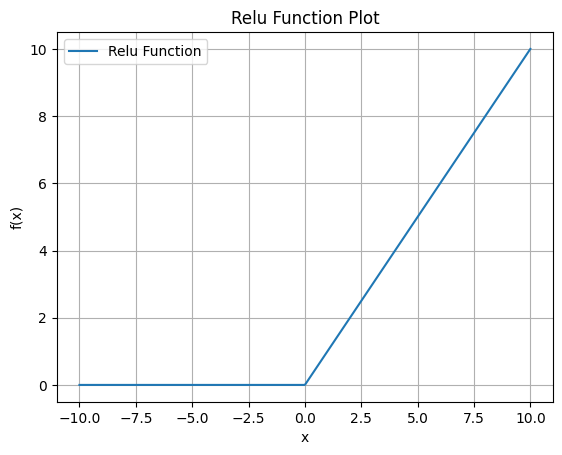

In [115]:
# This is what the relu function looks like

def relu(x):
    return np.maximum(0, x)

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 500)
# Compute y values using the relu function
y = relu(x)

# Plot the function
plt.plot(x, y, label="Relu Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Relu Function Plot")
plt.grid(True)
plt.legend()
plt.show()

### Neural networks: One layer

### Keras

In keras, we can define the neural network layer by layer. The first fully connected (dense) layer has 3 input nodes (the input layer), and 4 nodes. It does not use a bias term (the $b$ in $Wx + b$). The weights $W$ in the network will be initialized with small random values.

In [116]:
layer1_k = keras.Sequential([
    layers.Dense(4, input_dim=3, use_bias=False)
    ])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
layer1_k.weights

[<KerasVariable shape=(3, 4), dtype=float32, path=sequential/dense/kernel>]

We create an input vector ```x_np```

In [118]:
x_np = np.array([[1, 2, 3]])

And "send" the values through the first layer in the network:

In [119]:
layer1_k(x_np)

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[-2.0769851,  0.552669 ,  3.8447833, -0.7915982]], dtype=float32)>

Compare this with a matrix multiplication (note the order of the multiplication, and the dimensions of the vector and matrix): 

In [120]:
x_np @ layer1_k.weights[0]

array([[-2.07698506,  0.55266899,  3.84478331, -0.79159826]])

### PyTorch

In PyTorch, the first layer is defined similarly:

In [121]:
layer1_t = torch.nn.Linear(3, 4, bias=False) # 3 inputs, 4 outputs, no bias

In [122]:
layer1_t.weight

Parameter containing:
tensor([[-0.0784, -0.2372,  0.1172],
        [-0.3739,  0.5711, -0.2106],
        [ 0.5642, -0.1257,  0.3728],
        [-0.4489, -0.1961, -0.0592]], requires_grad=True)

In [123]:
x_t = torch.tensor([1.0, 2.0, 3.0])

In [124]:
layer1_t(x_t)

tensor([-0.2010,  0.1365,  1.4311, -1.0188], grad_fn=<SqueezeBackward4>)

Compare this with a matrix multiplication (note the order of the multiplication, and the dimensions of the vector and matrix): 


In [125]:
layer1_t.weight @ x_t

tensor([-0.2010,  0.1365,  1.4311, -1.0188], grad_fn=<MvBackward0>)

Or see: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [126]:
x_t @ layer1_t.weight.T

tensor([-0.2010,  0.1365,  1.4311, -1.0188], grad_fn=<SqueezeBackward4>)

### Neural Networks: More Layers

Now, we will add all the layers in the example network in sequence. 

### Keras

In [127]:
nn_k = keras.Sequential([
    layers.Dense(4, input_dim=3, use_bias=False),
    layers.Dense(2, use_bias=False),
    layers.Dense(1, use_bias=False)
    ])

In [128]:
nn_k.weights

[<KerasVariable shape=(3, 4), dtype=float32, path=sequential_1/dense_1/kernel>,
 <KerasVariable shape=(4, 2), dtype=float32, path=sequential_1/dense_2/kernel>,
 <KerasVariable shape=(2, 1), dtype=float32, path=sequential_1/dense_3/kernel>]

In [129]:
nn_k(x_np)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-1.8862994]], dtype=float32)>

In [130]:
x_np @ nn_k.weights[0] @ nn_k.weights[1] @ nn_k.weights[2]

array([[-1.88629913]])

### PyTorch

In [131]:
layer1_t = torch.nn.Linear(3, 4, bias=False)
layer2_t = torch.nn.Linear(4, 2, bias=False)
layer3_t = torch.nn.Linear(2, 1, bias=False)

In [132]:
(layer1_t.weight, layer2_t.weight, layer3_t.weight)

(Parameter containing:
 tensor([[-0.0630, -0.4868,  0.2738],
         [ 0.5165,  0.4471,  0.2988],
         [ 0.4171, -0.1165,  0.2803],
         [-0.2952, -0.2523, -0.2800]], requires_grad=True),
 Parameter containing:
 tensor([[-0.4971, -0.3307,  0.1820,  0.1730],
         [-0.3764,  0.3322, -0.0077, -0.2097]], requires_grad=True),
 Parameter containing:
 tensor([[-0.2558, -0.6738]], requires_grad=True))

In [133]:
layer3_t(layer2_t(layer1_t(x_t)))

tensor([-0.6047], grad_fn=<SqueezeBackward4>)

In [134]:
x_t @ layer1_t.weight.T @ layer2_t.weight.T @ layer3_t.weight.T

tensor([-0.6047], grad_fn=<SqueezeBackward4>)

As you can see, the simple neural network in this example is just matrix multiplication, and when adding a bias $b$, it will be a sequence of affine transformations of the input data. However, these operations can easily be concatenated into one matrix and bias, the interesting thing happens when we add non-linearity (see the lectures on neural networks).

## Datasets

We will now look at a dataset with 3 different types of iris.

<img src=iris.png alt=""/>

In statistics, observations are often arranged by rows like Fisher's Iris dataset (1936)

<img src=Fisher_iris.png alt=""/>

### Matrices and datasets
Representing the $x$ input (from one data sample) as a column vector (a one-column matrix) and $W$ denoting the weight matrix, we just have to transpose the matrix product:

$(Wx)^{T} = x^TW^T = \hat{y}$

$x^T$ is now a row vector (a one-row matrix) and we can apply the product to the whole dataset $X$ yielding a column vector of predicted outputs:

$XW^T = \bold{\hat{y}}$.

In [135]:
from sklearn.datasets import load_iris

In [136]:
iris_dataset = load_iris()

In [137]:
X = torch.from_numpy(iris_dataset['data']).float()
Y = iris_dataset['target']


In [138]:
X

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [139]:
X.dtype
#X.size()

torch.float32

In [140]:
layer1_t = torch.nn.Linear(4, 25, bias=False)
layer2_t = torch.nn.Linear(25, 25, bias=False)
layer3_t = torch.nn.Linear(25, 3, bias=False)

In [141]:
layer3_t(layer2_t(layer1_t(X)))
#print(result.size())

tensor([[-6.7057e-01,  2.8334e-01, -8.1938e-01],
        [-6.0415e-01,  2.6061e-01, -7.2672e-01],
        [-6.1595e-01,  2.5810e-01, -7.4947e-01],
        [-6.4059e-01,  2.3136e-01, -7.0139e-01],
        [-6.8575e-01,  2.7764e-01, -8.2478e-01],
        [-7.7340e-01,  2.6293e-01, -8.6172e-01],
        [-6.6147e-01,  2.3403e-01, -7.5315e-01],
        [-6.7666e-01,  2.6550e-01, -7.8326e-01],
        [-5.9709e-01,  2.2238e-01, -6.6502e-01],
        [-6.3857e-01,  2.6440e-01, -7.3408e-01],
        [-7.1272e-01,  2.9965e-01, -8.6513e-01],
        [-6.9792e-01,  2.4195e-01, -7.5254e-01],
        [-6.0755e-01,  2.6436e-01, -7.2187e-01],
        [-5.5864e-01,  2.5445e-01, -7.1082e-01],
        [-6.9311e-01,  3.6050e-01, -9.8287e-01],
        [-8.0135e-01,  3.1079e-01, -9.8767e-01],
        [-6.9918e-01,  2.9854e-01, -9.0954e-01],
        [-6.6853e-01,  2.7227e-01, -8.1485e-01],
        [-7.5756e-01,  2.9436e-01, -8.7962e-01],
        [-7.2856e-01,  2.6822e-01, -8.4723e-01],
        [-7.0836e-01

In [142]:
X @ layer1_t.weight.T @ layer2_t.weight.T @ layer3_t.weight.T

tensor([[-6.7057e-01,  2.8334e-01, -8.1938e-01],
        [-6.0415e-01,  2.6061e-01, -7.2672e-01],
        [-6.1595e-01,  2.5810e-01, -7.4947e-01],
        [-6.4059e-01,  2.3136e-01, -7.0139e-01],
        [-6.8575e-01,  2.7764e-01, -8.2478e-01],
        [-7.7340e-01,  2.6293e-01, -8.6172e-01],
        [-6.6147e-01,  2.3403e-01, -7.5315e-01],
        [-6.7666e-01,  2.6550e-01, -7.8326e-01],
        [-5.9709e-01,  2.2238e-01, -6.6502e-01],
        [-6.3857e-01,  2.6440e-01, -7.3408e-01],
        [-7.1272e-01,  2.9965e-01, -8.6513e-01],
        [-6.9792e-01,  2.4195e-01, -7.5254e-01],
        [-6.0755e-01,  2.6436e-01, -7.2187e-01],
        [-5.5864e-01,  2.5445e-01, -7.1082e-01],
        [-6.9311e-01,  3.6050e-01, -9.8287e-01],
        [-8.0135e-01,  3.1079e-01, -9.8767e-01],
        [-6.9918e-01,  2.9854e-01, -9.0954e-01],
        [-6.6853e-01,  2.7227e-01, -8.1485e-01],
        [-7.5756e-01,  2.9436e-01, -8.7962e-01],
        [-7.2856e-01,  2.6822e-01, -8.4723e-01],
        [-7.0836e-01

Of course, the network is not yet trained.

More on datasets:  https://github.com/pnugues/ilppp/blob/master/programs/appB/python/tourofpython.ipynb
